In [1]:
#Problem Statement:
#The goal is to predict the next days's closing price of a selected stock
# (eg: Apple) using past data.
#-Will be using 'yfinance' API to fetch stock data
#-basic data explorationa nd visualization
#-Traina regression midel using features like Open, High, Low, Volume
#-predict the next day's close value
#-evaluate the model performance using MAE and plot prediction

In [2]:
#load dataset from yfinance
!pip install yfinance
import yfinance as yf
import pandas as pd

In [20]:
#using Tesla stock up to date
import datetime
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)
df = yf.download('TSLA', start=start_date, end=end_date)
#making date a column
df.reset_index(inplace=True)
df.dropna(inplace=True)
df.head() #checking data

<ipython-input-20-2837006699>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2024-06-17,187.440002,188.809998,177.000000,177.919998,109786100
1,2024-06-18,184.860001,187.199997,182.369995,186.559998,68982300
2,2024-06-20,181.570007,185.210007,179.660004,184.679993,55893100
3,2024-06-21,183.009995,183.949997,180.690002,182.300003,63029500
4,2024-06-24,182.580002,188.800003,182.550003,184.970001,61992100


In [21]:
# useful technical indicators
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=5).std()
df['Prev_Close'] = df['Close'].shift(1)
df['Next_Close'] = df['Close'].shift(-1)

# will drop rows with NaNs from rolling calculations
df.dropna(inplace=True)

In [22]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'Returns', 'Volatility', 'Prev_Close']
X = df[features]
y = df['Next_Close']

<Figure size 1200x500 with 0 Axes>

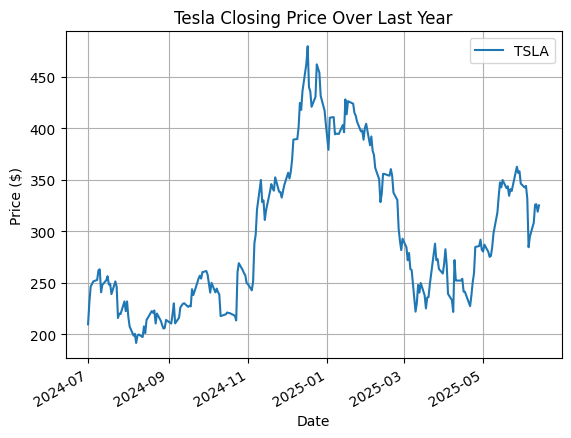

In [23]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
df.set_index('Date')['Close'].plot(label='Close Price')
plt.title("Tesla Closing Price Over Last Year")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()


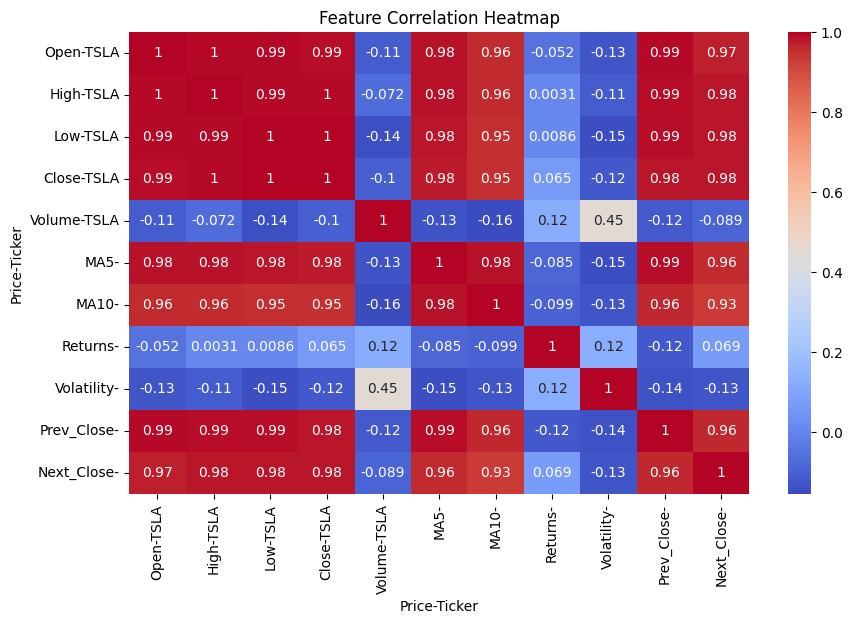

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df[features + ['Next_Close']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


In [35]:
#Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 4))

Model Evaluation:
Mean Absolute Error (MAE): 10.11
Root Mean Squared Error (RMSE): 13.85
R-squared (R²): 0.8794


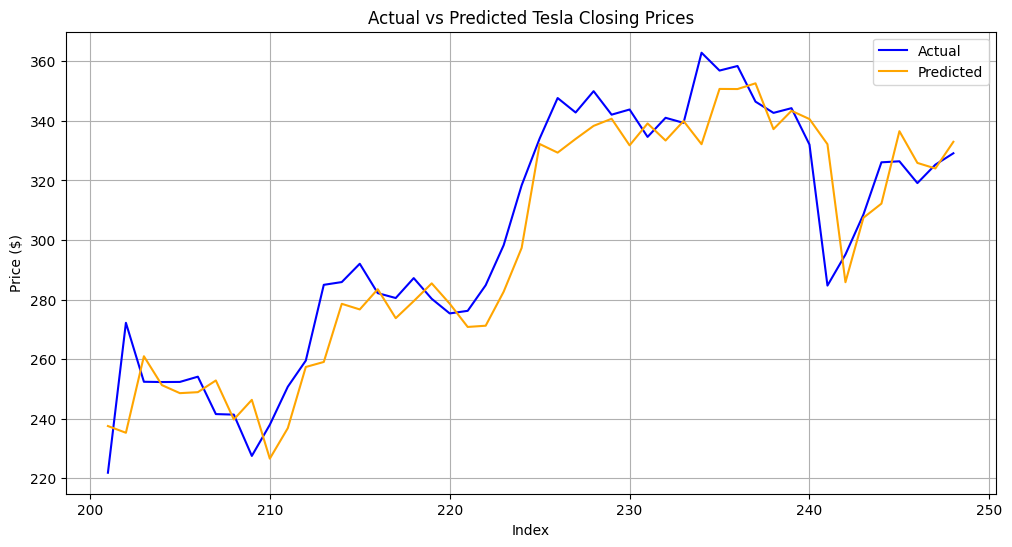

In [36]:
# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title("Actual vs Predicted Tesla Closing Prices")
plt.xlabel("Index")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Conclusion:
#- The model captures general trends in Tesla stock prices over the last year.
#- Adding technical indicators like moving averages and volatility helped improve predictions.
#- R² score shows decent correlation.
